In [1]:
import torch
import torch.nn as nn
from torch import sigmoid
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader

torch.manual_seed(0)

In [2]:
# Function for plotting the model

def plotStuff(X, Y, model, epoch, leg=True):

    plt.plot(X.numpy(), model(X).detach().numpy(), label=('epoch ' + str(epoch)))
    plt.plot(X.numpy(), Y.numpy(), 'or')
    plt.xlabel('x')
    if leg == True:
        plt.legend()
    else:
        pass

def plotData(X, Y):
    plt.plot(X.numpy(), Y.numpy(), 'or')
    plt.xlabel('x')


In [3]:
# Define class Net

class Net(nn.Module): # Net inherits from nn.Module that is the base class for all neural network modules

    # Constructor
    def __init__(self, D_in, H, D_out): # Initializes the neural network's layers
        super(Net, self).__init__() # Call the constructor of the parent class nn.Module, ensure that all its functionality is available to the Net class
        # hidden layer
        self.linear1 = nn.Linear(D_in, H) # Create first linear layer. D_in input features and H output features. nn.Linear initializes the weights and biases for this layer
        self.linear2 = nn.Linear(H, D_out) # Create the second linear layer. H input features and produces D_out output features
        # Define the first linear layer as an attribute. These attrubutes will be used to store intermediate values during the forward pass.
        self.a1 = None # Will store the activated output of the hidden layer
        self.l1 = None # Will store the linear transformation before activation
        self.l2 = None # Will store the output of the second linear layer before activation

    # Prediction
    def forward(self, x): # Takes x and computes yhat
        self.l1 = self.linear1(x) # applies the first linear transformation to the input x. The result is stored in self.l1
        self.a1 = sigmoid(self.l1) # applies the sigmoid activation function to self.l1 and stores the result in self.a1
        self.l2 = self.linear2(self.a1) # applies the second linear transformation to self.a1 (the activated output of the hidden layer) and stores the result in self.l2
        yhat = sigmoid(self.linear2(self.a1)) # applies the sigmoid activation function to self.l2 (the output of the second linear layer) and stores the final output in yhat
        return yhat


In [4]:
# define the training function

def train(Y, X, model, optimizer, criterion, epochs=1000):
    cost = []
    total = 0
    for epoch in range(epochs):
        total = 0
        for y, x in zip(Y, X):
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            # cumulative loss
            total += loss.item()
        cost.append(total)
        if epoch % 300 == 0:
            plotStuff(X, Y, model, epoch, leg=True)
            plt.show()
            model(X) # performs a forward pass through the model with the input data X. This step populates the intermediate activation values in the model's attributes (in this case, model.a1)
            # [:, 0] and [:, 1] extract the first and second dimensions of the activation values, respectively, assuming the hidden layer has at least two neurons
            # plt.scatter creates a scatter plot where the x-axis and y-axis correspond to the first and second dimensions of the hidden layer activations
            # c=Y.numpy().reshape(-1) colors the points based on their corresponding target labels Y. The .numpy().reshape(-1) ensures that Y is in the correct shape for coloring the scatter plot points
            plt.scatter(model.a1.detach().numpy()[:, 0], model.a1.detach().numpy()[:, 1], c=Y.numpy().reshape(-1))
            plt.title('activations')
            plt.show()
    return cost

# Make the data

In [5]:
X = torch.arange(-20, 20, 1).view(-1, 1).type(torch.FloatTensor)
Y = torch.zeros(X.shape[0])
Y[(X[:, 0] > -4) & (X[:, 0] < 4)] = 1.0

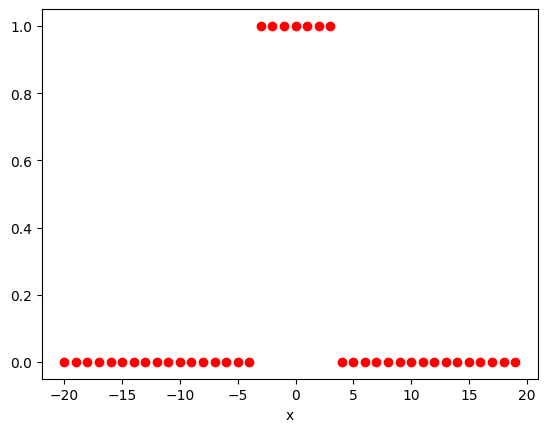

In [6]:
plotData(X, Y)

# Define the NN, CF, O and train the model

In [7]:
# The loss function

def criterion_cross(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

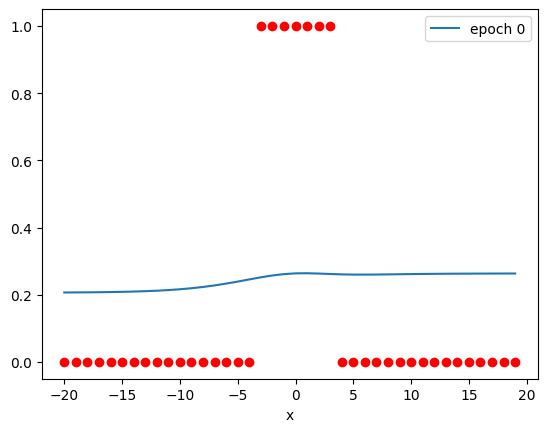

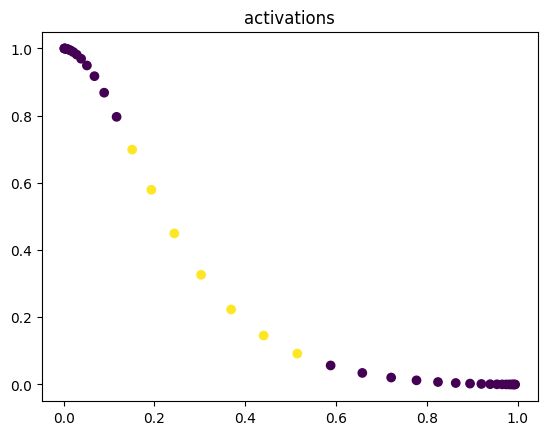

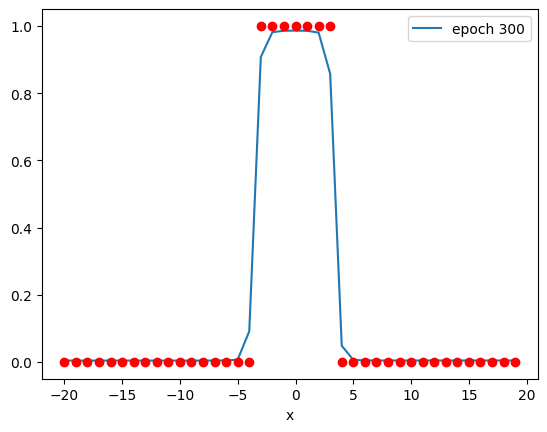

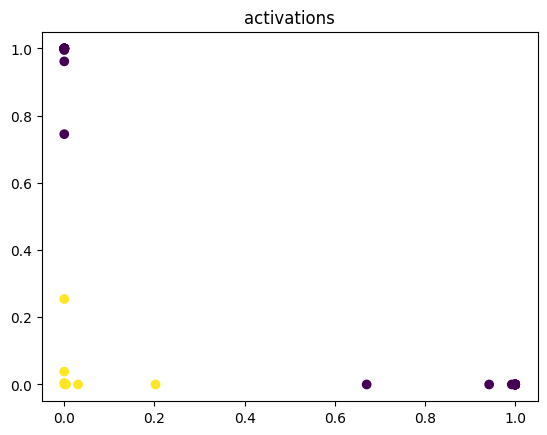

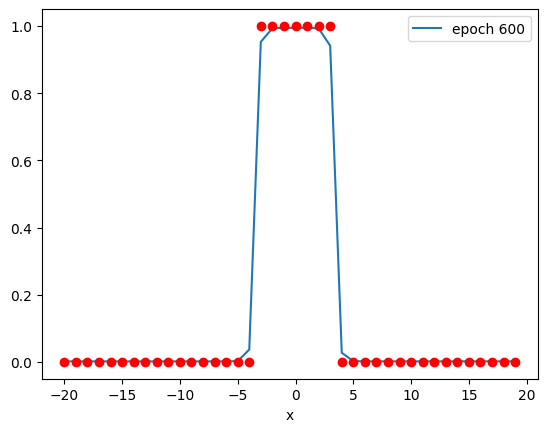

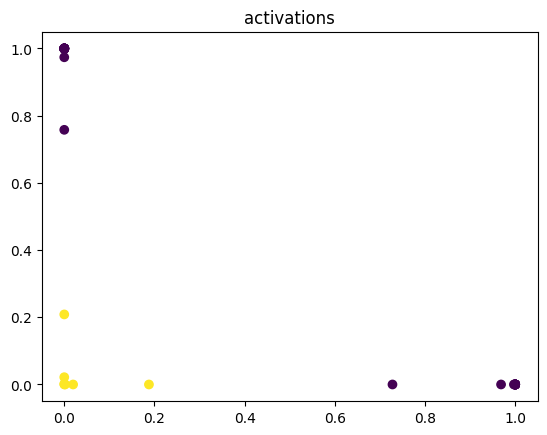

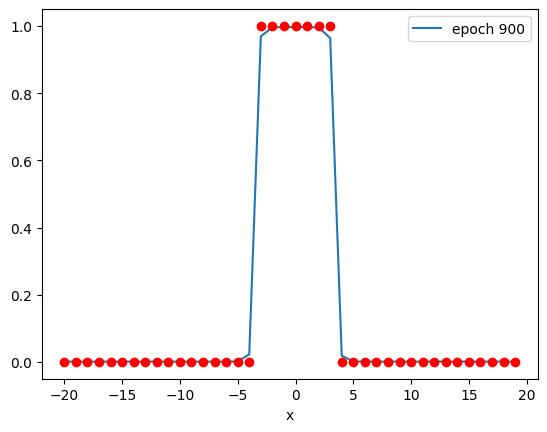

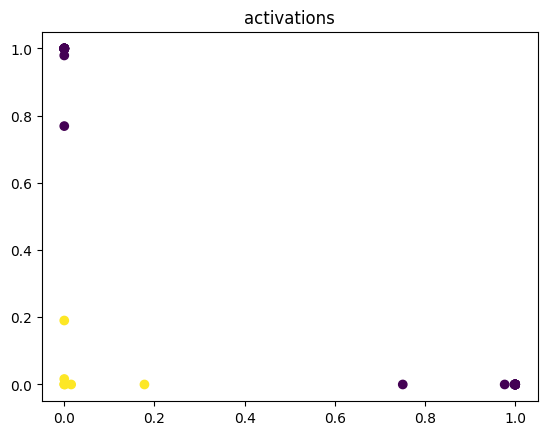

Text(0.5, 1.0, 'cross entropy loss')

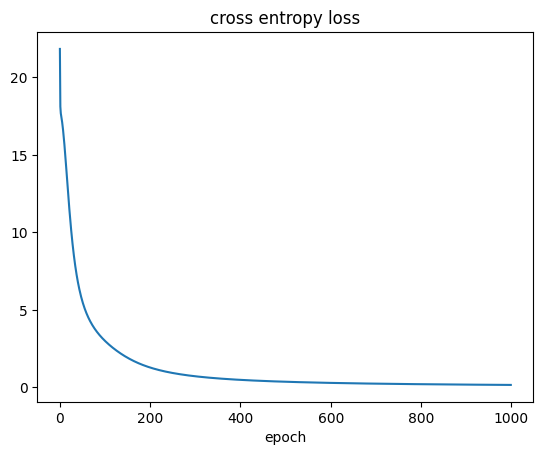

In [8]:
# Define the NN, = and train the model

D_in = 1 # Size of input
H = 2 # Size of hidden layer
D_out = 1 # Number of outputs

learning_rate = 0.1

model = Net(D_in, H, D_out)

optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

cost_cross = train(Y, X, model, optimizer, criterion_cross, epochs=1000)

plt.plot(cost_cross)
plt.xlabel('epoch')
plt.title('cross entropy loss')

# Multiple Neurons

Try to use the same model as before but with different data and more hidden layers

In [13]:
class Data(Dataset):
    def __init__(self):
        self.x = torch.linspace(-20, 20, 100).view(-1, 1)

        self.y = torch.zeros(self.x.shape[0])
        self.y[(self.x[:, 0] > -10) & (self.x[:, 0] < -5)] = 1
        self.y[(self.x[:, 0] > 5) & (self.x[:, 0] < 10)] = 1

        self.y = self.y.view(-1, 1)
        self.len = self.x.shape[0]

    def __getitem__(self, index):
        return self.x[index], self.y[index]
    
    def __len__(self):
        return self.len

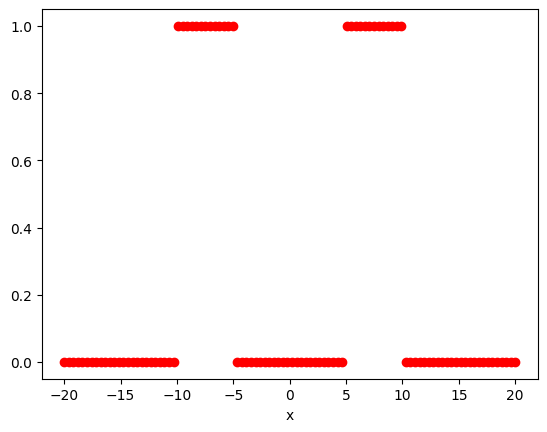

In [15]:
data_set = Data()
plotData(data_set.x, data_set.y)

In [29]:
def train2(data_set,model,criterion, train_loader, optimizer, epochs=5,plot_number=10):
    cost=[]

    for epoch in range(epochs):
        total=0
        
        for x,y in train_loader:
            optimizer.zero_grad()
            
            yhat=model(x)
            loss=criterion(yhat,y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total+=loss.item()
            
        if epoch%plot_number==0:
            plotStuff(data_set.x,data_set.y,model, epoch)
            plt.show()
        
        cost.append(total)
    plt.figure()
    plt.plot(cost)
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.show()
    return cost

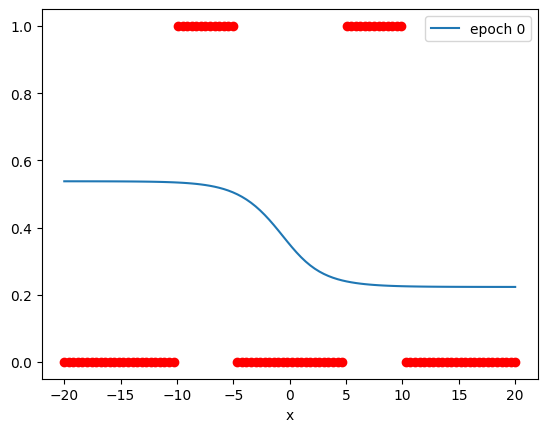

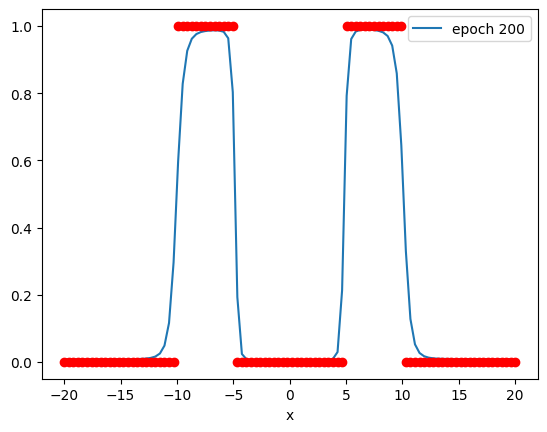

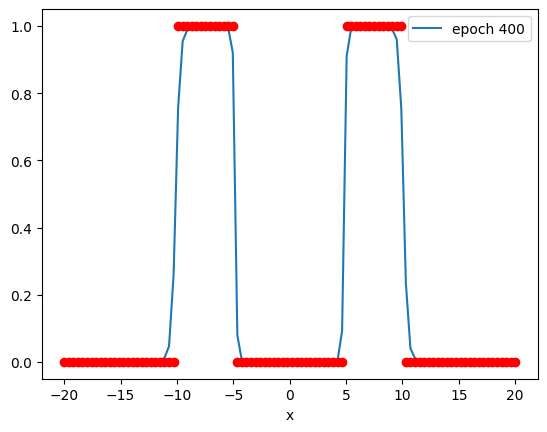

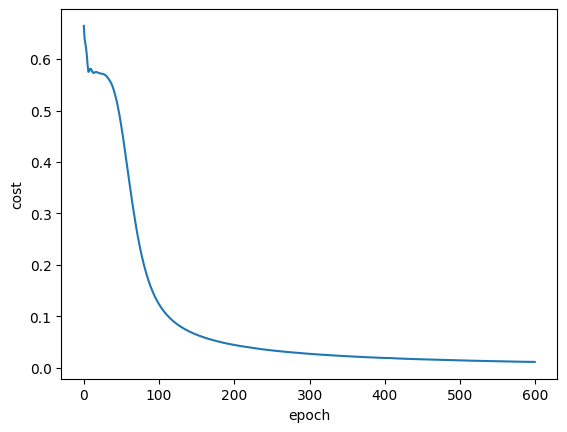

In [159]:
model = Net(1,4,1) # 4 neurons is the minimum necessary. 
learning_rate = 0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
train_loader = DataLoader(dataset=data_set, batch_size=100)
COST=train2(data_set,model,criterion, train_loader, optimizer, epochs=600,plot_number=200)

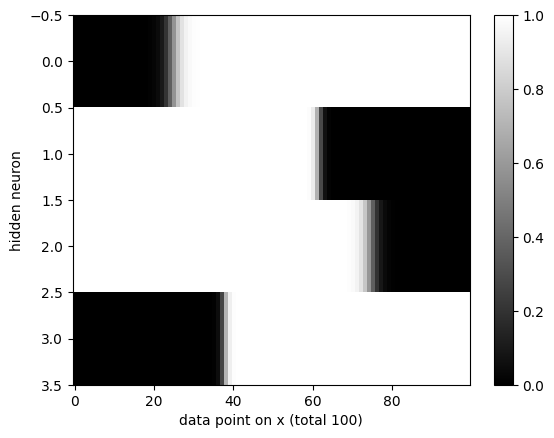

In [160]:
# If you do 4 neourons you'll see how hidden neurons substract to do the correct shape.
plt.imshow(model.a1.detach().numpy().transpose(), aspect='auto', cmap='gray')
plt.ylabel('hidden neuron')
plt.xlabel('data point on x (total 100)')
plt.colorbar()